In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np

VERBOSE = False
_print = lambda s, verbose=VERBOSE: print(s, flush=True) if verbose else None

# Overview
We can consider an LLM to be basically executing walks through a graph, where each node is a word. Each node has some distribution of probabilities across its neighbors. We can then think about sentences as the manifestation of some "rule" that determines the sequence of the walk.

We can interogate some inherent characteristics of transformers by simplifying this structure in a way that preserves this core insight (representing next-token-prediction as process of learning some set of rules over some set of nodes using some set of walks).



We do this in three steps:
1. **Generate data**:
    a. Implement rules as
2. **Train a transformer model on that data**
3. **Analyze those results**

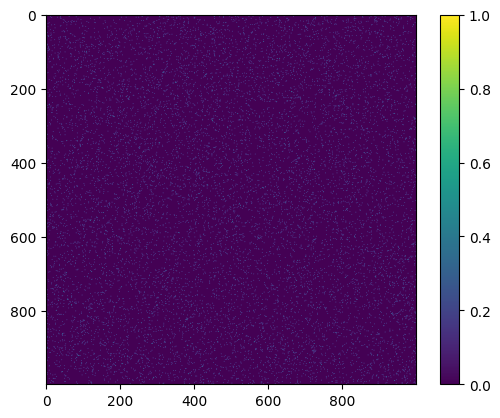

In [17]:
# Define the size of the array and the number of ones
n_nodes = 1000
n_edges = 12000

node_values = np.arange(n_nodes)

# Create a flat array with 200 ones and the rest zeros
flat_array = np.zeros(n_nodes * n_nodes, dtype=int)
flat_array[:n_edges] = 1

# Shuffle the array to randomly distribute the ones
np.random.shuffle(flat_array)

# Reshape the flat array into a 100x100 matrix
graph = flat_array.reshape(n_nodes, n_nodes)

# Multiply the upper triangle of the matrix by -1 to make it a directed graph
# This is AI generated code, I have no idea whether it makes sense
# TBH I just can't think of how to make a directed graph here.
# graph = graph - 2 * np.triu(graph, k=1)


plt.imshow(graph, cmap="viridis")
plt.colorbar()

In [ ]:
# Define our rules as functions that take in some set of candidate nodes and only return the ones that pass the rule
# idk yet how to define repeater
rule_ascender = lambda current_node, candidates_nodes: candidates_nodes[
    current_node < candidates_nodes
]
rule_descender = lambda current_node, candidates_nodes: candidates_nodes[
    current_node > candidates_nodes
]
rule_even = lambda current_node, candidates_nodes: candidates_nodes[
    candidates_nodes % 2 == 0
]
rule_odd = lambda current_node, candidates_nodes: candidates_nodes[
    candidates_nodes % 2 == 1
]

In [19]:
# Find each node's outgoing edges
# The only value to using a dict here is to remind us that the node has a separate identity and value.
# They just happen to be the same under this implementation.
outgoing_edges = {col: np.where(graph[:, col] == 1)[0] for col in range(n_nodes)}
for col, indices in outgoing_edges.items():
    print(f"Column {col}: {indices}")

Column 0: [277 285 351 465 486 564 646 808 928]
Column 1: [ 31 214 226 636 640 643 651 694 697 820 955]
Column 2: [103 137 143 159 272 310 324 336 523 763 913]
Column 3: [ 50  83 325 395 400 447 469 502 514 566 575 639 871 889 901 903 973]
Column 4: [ 81 246 302 356 530 618 643 651 745 758 805 817 826 836 873 900 935 969]
Column 5: [ 25  34  58  93  99 157 212 252 415 459 554 563 718 771 786 809 812 850
 852 859 882]
Column 6: [ 60  87  90 394 773]
Column 7: [ 59  97 121 361 573 632 648 697 723 928]
Column 8: [  2  23  94 129 177 223 244 457 460 527 594 610 904 951 962 985]
Column 9: [ 96 115 243 245 293 426 456 569 838 873 949]
Column 10: [204 217 220 547 563 584 696 914]
Column 11: [128 251 299 440 472 485 679 785 914]
Column 12: [  4   7  42  57 296 409 415 450 511 516 541 546 556 852 972 995]
Column 13: [  1  51  70 248 372 386 515 566 633 742 819 858]
Column 14: [ 56 110 286 465 490 516 685 729 780 990]
Column 15: [  9  29  63 179 211 266 377 682 726 816 871]
Column 16: [ 99 141 1

In [ ]:
def generate_walk(rule, edges, max_length=50):
    # For a given rule, filter down the set of outgoing edges to only those that satisfy the rule.
    valid_edges = {col: rule(col, indices) for col, indices in edges.items()}

    current_node = np.random.choice(n_nodes)

    # We could use seed-node here, but then we have to check its validity
    # which is kinda annoying
    walk = []
    for i in range(max_length):
        _print(f"{current_node}: {valid_edges[current_node]}")
        if len(valid_edges[current_node]) == 0:
            _print(i, "break")
            break
        new_node = np.random.choice(valid_edges[current_node])
        walk.append(new_node)
        current_node = new_node
    return walk


walks = [
    generate_walk(rule_ascender, edges=outgoing_edges, max_length=20)
    for _ in range(100)
]
walks = [w for w in walks if len(w) > 4]
walks

1
1
2
5
4
3
1
3
2
6
1
2
3
4
1
2
4
1
6
1
5
2
2
3
4
3
2
3
1
4
5
2
3
1
3
0
3
3
1
1
3
1
1
4
4
1
2
3
4
2
7
4
4
4
2
4
2
6
3
3
0
5
5
8
0
3
0
4
2
3
6
5
4
2
3
3
3
2
2
0
3
1
2
1
4
1
4
2
1
3
5
1
2
4
1
2
3
2
1
2


[[390, 416, 614, 619, 920],
 [297, 424, 463, 885, 922, 989],
 [647, 893, 934, 940, 975, 978],
 [650, 819, 854, 950, 966],
 [168, 523, 953, 962, 995],
 [796, 807, 893, 934, 940, 975, 978],
 [856, 895, 934, 940, 975, 978],
 [151, 503, 555, 913, 980],
 [562, 886, 908, 974, 999],
 [740, 796, 807, 893, 934, 940, 975, 978],
 [259, 472, 620, 901, 948, 973],
 [392, 787, 850, 962, 998],
 [499, 704, 893, 977, 995]]